Make a lab (on Jupyter) to demonstrate the concept of ROC curve and AUC with practical hands-on on one or more datasets of your choice.

Please include 1) notes in the notebook (e.g., as markup cells) which demonstrate your understanding of these two concepts, i.e., explain in your own words what is ROC and AUC and how they are constructed,Ã‚Â and 2) comments explaining the code.Ã‚Â Try to write brief sentences which provide concrete understanding.Ã‚Â 

Some helpful pointers are:Ã‚Â 

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('.....Setup complete')

def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

.....Setup complete


### ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1. True Positive Rate
2. False Positive Rate

1. Logistic regression for binary classification
Given one feature, log reg will output a probability, p, with respect to the target variable. If p is greater than 0 (point) 5, we label the data as '1'; if p is less than 0 (point) 5, we label it '0'.

2. Linear decision boundary
Log reg produces a linear decision boundary. Using logistic regression in scikit-learn

3. Logistic regression in scikit-learn
follows exactly the same formula that you now know so well: perform the necessary imports, instantiate the classifier, split your data into training and test sets, fit the model on your training data, and predict on your test set. Here we have used the voting dataset that you worked with earlier in the course.

### Bank Marketing Dataset Binary Classification ROC

In [115]:
df=pd.read_csv('bank.csv')

In [116]:
#clean the dataset
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


In [117]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

TEST_SIZE = 0.3
RAND_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)


In [118]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4)

4. Probability thresholds
Notice that in defining logistic regression, we have specified a threshold of 0 (point) 5 for the probability, a threshold that defines our model. Note that this is not particular for log reg but also could be used for KNN, for example. Now, what happens as we vary this threshold?

5. The ROC curve
In particular, what happens to the true positive and false positive rates as we vary the threshold of decision boundary
When the threshold equals zero, the model predicts '1' for all the data, which means the true positive rate is equal to the false positive rate is equal to one. When the threshold equals '1', the model predicts '0' for all data, which means that both true and false positive rates are 0. If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates.The set of points we get when trying all possible thresholds is called the receiver operating characteristic curve or ROC curve.


6. Plotting the ROC curve
We used the predicted probabilities of the model assigning a value of '1' to the observation in question. This is because to compute the ROC we do not merely want the predictions on the test set, but we want the probability that our log reg model outputs before using a threshold to predict the label. To do this we apply the method predict proba to the model and pass it the test data. predict proba returns an array with two columns: each column contains the probabilities for the respective target values. We choose the second column, the one with index 1, that is, the probabilities of the predicted labels being '1'.

In [119]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [120]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8784304745955733 0.7637192192310194


Optimal threshold value for Logistic Regression is: 0.39119649340450763
Optimal threshold value for KNN is: 0.5


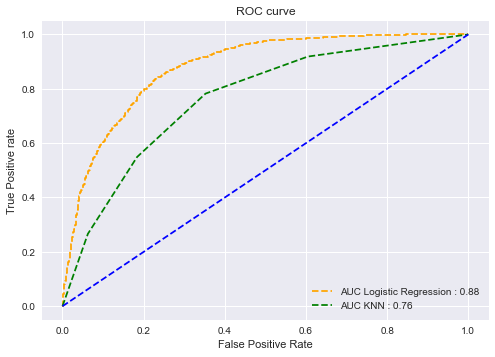

In [122]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AUC Logistic Regression : '+str(round(auc_score1,2)))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AUC KNN : '+str(round(auc_score2,2)))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

optimal_idx = np.argmax(tpr1- fpr1)
optimal_threshold = thresh1[optimal_idx]
print("Optimal threshold value for Logistic Regression is:", optimal_threshold)

optimal_idx = np.argmax(tpr2- fpr2)
optimal_threshold = thresh2[optimal_idx]
print("Optimal threshold value for KNN is:", optimal_threshold)


plt.savefig('ROC',dpi=300)
plt.show();

### Multi Class Fault Detection Data 
Multi Class ROC using the one vs rest classifier technique and calculates the TPR and FPR of each class

In [107]:
full_data=pd.read_csv('faults.csv')

In [108]:

full_data.X_Maximum.fillna(full_data.X_Maximum.median(),inplace=True)
full_data.Steel_Plate_Thickness.fillna(full_data.Steel_Plate_Thickness.median(),inplace=True)
full_data.Empty_Index.fillna(np.mean(full_data.Empty_Index),inplace=True)

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=full_data.drop('target',axis=1)
Y=le.fit_transform(full_data['target'])

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)

In [111]:
fl=dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.46023564064801176
0.4339622641509434


Optimal Threshold for Bumps is 0.8160602537931768
Optimal Threshold for Dirtiness is 0.9815947124892526
Optimal Threshold for K_Scatch is 0.9817395885334295
Optimal Threshold for Other_Faults is 0.7794259349612217
Optimal Threshold for Pastry is 0.9590302980370566
Optimal Threshold for Stains is 0.9968255833453905
Optimal Threshold for Z_Scratch is 0.936516089754147


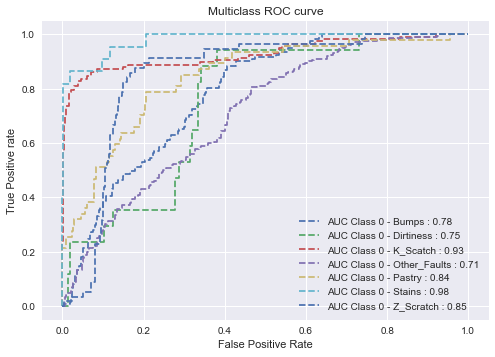

In [113]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
auc= {}
n_class = 7
from sklearn.metrics import roc_auc_score

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    auc[i]=metrics.auc(fpr[i], tpr[i])
 
i=0
for p in fl:
    
    optimal_idx = np.argmax(tpr[i]- fpr[i])
    optimal_threshold = thresh1[optimal_idx]
    print('Optimal Threshold for '+p+ ' is '+ str(optimal_threshold))
    plt.plot(fpr[i], tpr[i], linestyle='--', label='AUC Class 0 - '+p +' : '+ str(round(auc[i],2)))
    i=i+1

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

We can see that the Stain Class has the highest AUC followed by K Scratch thi indicates that the model is more sensitive in predicting these classess well.